In [2]:
import pandas as pd
import pingouin as pg
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
from hyppo.independence import Dcorr
import scipy.optimize as so

1. Найти коэффициенты корреляции баллов ЕГЭ и частные коэффициенты корреляции и сделать выводы
о структуре их зависимости.

In [26]:
data=pd.read_csv("/Users/mihailkondrasin/Desktop/Матпрак/сем 2/CSVS/Dataset-18-Prak.csv",sep=',')
data.dropna()
print(data.corr())
print(pg.pcorr(data))

          mark.1    mark.2    mark.3    mark.4
mark.1  1.000000  0.511660  0.432463  0.123863
mark.2  0.511660  1.000000  0.436564  0.218213
mark.3  0.432463  0.436564  1.000000  0.254438
mark.4  0.123863  0.218213  0.254438  1.000000
          mark.1    mark.2    mark.3    mark.4
mark.1  1.000000  0.398038  0.274337 -0.037296
mark.2  0.398038  1.000000  0.246543  0.128312
mark.3  0.274337  0.246543  1.000000  0.183489
mark.4 -0.037296  0.128312  0.183489  1.000000


2. Для распределений, изображенных на рисунке 1 (сгенерируйте выборки самостоятельно, размер выборок 50 или 100), сравните критерии Секея-Риццо, Кендалла и хи-квадрат. Для распределения хи-квадрат ячейки предлагается выбирать, деля данные по каждой из строк на равные фрагменты.

In [203]:
def quantiles_porovnu(X,k):#выдает вероятности попадания в отрезки, в которые попало одинаковое число элементов выборки
	X=np.sort(X)
	c=1
	doli=[]
	for i in range(len(X)):
		if i==int(round(len(X)*c/k)):
			doli.append(i)
			c+=1
	return [X[i] for i in doli]

def nuij(x,y,xquantmin,xquantmax,yquantmin,yquantmax,n):
	result=0
	for i in range(n):
		if xquantmax>=x[i]>xquantmin and yquantmin<y[i]<=yquantmax:
			result+=1
	return result

def chisqstat(x,y):
	n=len(x)
	k=int(round(n**0.2))
	quantx=[min(x)-1]+quantiles_porovnu(x,k)+[max(x)+1]
	quanty=[min(y)-1]+quantiles_porovnu(y,k)+[max(y)+1]
	nu=[]
	for i in range(k):
		nu.append([])
		for j in range(k):
			nu[i].append(nuij(x,y,quantx[i],quantx[i+1],quanty[j],quanty[j+1],n))
	nui=[0]*k
	nuj=[0]*k
	for i in range(k):
		for j in range(k):
			nui[i]+=nu[i][j]
	for i in range(k):
		for j in range(k):
			nuj[j]+=nu[i][j]
	for i in range(k):
		if nui[i]==0 or nuj[i]==0:
			return 0
	stat=0
	for i in range(k):
		for j in range(k):
			stat+=n/(nui[i]*nuj[j])*(nu[i][j]-nui[i]*nuj[j]/n)**2
	return 1-st.chi2.cdf(stat,df=(k-1)**2)

In [142]:
def generator_circle(n):
	phi=np.random.uniform(low=0,high=2*np.pi,size=n)
	noize=st.norm.rvs(loc=0,scale=0.1,size=n)
	return (1+noize)*np.cos(phi),(1+noize)*np.sin(phi)
def generator_clouds(n):
	clouds=[]
	x=np.random.normal(loc=0,scale=0.2,size=n)
	y=np.random.normal(loc=0,scale=0.2,size=n)
	for i in range(n):
		d=np.random.randint(4)
		clouds.append([(d//2-0.5)*2+x[i],(d%2-0.5)*2+y[i]])
	return [i[0] for i in clouds],[i[1] for i in clouds]
def generator_spiral(n):
	unif=np.random.uniform(low=0,high=1,size=n)
	noizex=st.norm.rvs(loc=0,scale=0.05,size=n)
	noizey=st.norm.rvs(loc=0,scale=0.05,size=n)
	onsp=-(1-unif**1.5)**(2/3)*6*np.pi+6*np.pi
	return onsp/3*np.cos(onsp)+noizex, onsp/3*np.sin(onsp)+noizey
def generator(mode,n):
	if mode==1:
		return generator_circle(n)
	if mode==2:
		return generator_clouds(n)
	else:
		return generator_spiral(n)

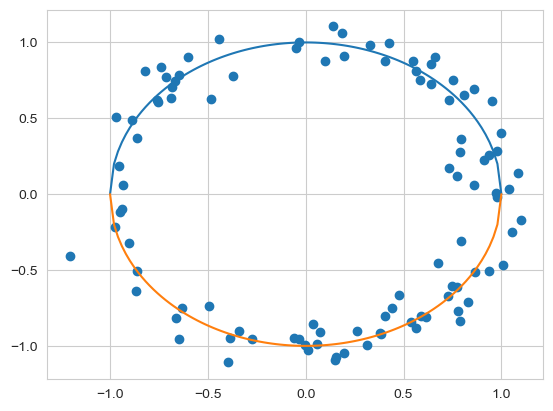

In [143]:
x,y=generator(1,100)
plt.scatter(x,y)
x=np.linspace(-1,1,100)
plt.plot(x,(1-x**2)**0.5)
plt.plot(x,-(1-x**2)**0.5)

[1.0936261629879418, 0.7398612330404019, -0.7300225746242589, -1.1773261796848125, -1.191263786890747, -1.121638828264505, -0.9693044830970997, 0.829582629112507, -1.1532729073075767, 0.910931314351782, -1.0510279222105465, 0.8220417864010797, 0.9643980788595459, 1.0028845429664208, 0.7614525879556098, 0.7457519198326985, -0.8782714481018538, -0.9331626457334263, -0.4898771255910127, 1.1322917950612095, -1.0422869736240092, -0.9856183691944704, -0.8732814030090711, -1.1093566750639072, 0.9012175881846894, -1.0114974615882248, 1.0315927971766718, 1.0162329274371276, -0.7557833936200397, 1.1798652610759972, 1.2800258137471803, -0.8534564111291737, -0.9293707682149804, 1.28153481374908, 1.1284953766813661, -1.2386704625947438, -0.6115369149677194, 1.2087969098431595, 0.7417051823693713, 0.9222025536988648, -0.8155138173521331, 1.023794465898174, 0.9723749916658333, -0.9704592060370616, 1.2255828767123496, -1.0225750266826317, -0.724519603855156, -1.3782331534091536, 0.9160117639458584, 0.

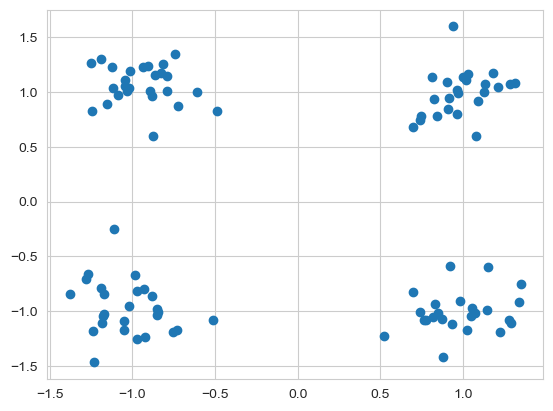

In [218]:
x,y=generator(2,100)
print(x,y)
plt.scatter(x,y)

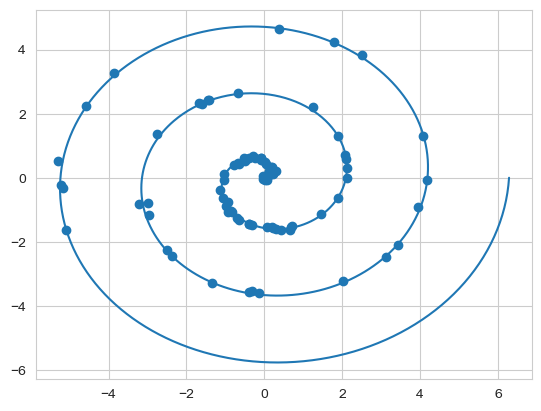

In [145]:
x,y=generator(3,100)
t=np.linspace(0,6*np.pi,1000)
xsp=t/3*np.cos(t)
ysp=t/3*np.sin(t)
plt.scatter(x,y)
plt.plot(xsp,ysp)

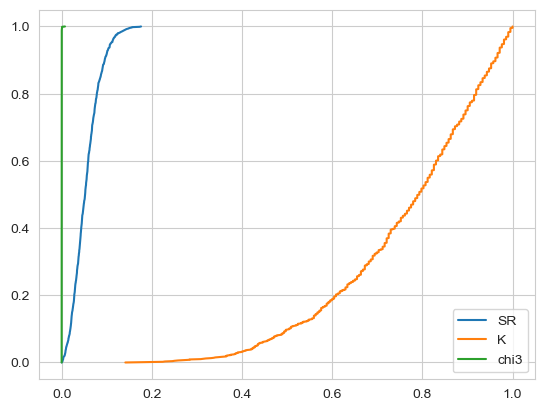

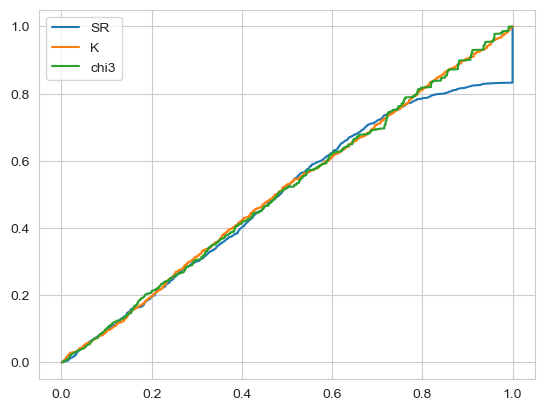

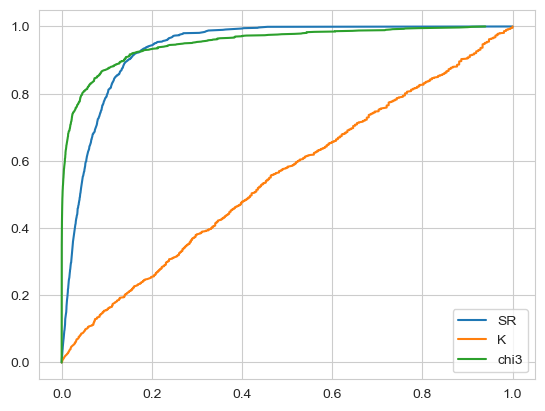

In [226]:
for mode in range(1,4):
	pSRs=[]
	pKs=[]
	pchisq=[]
	for i in range(1000):
		x,y=generator(mode,100)
		x=np.array(x)
		y=np.array(y)
		statSR,pSR=Dcorr().test(x,y)
		pSRs.append(pSR)
		statK,pK=st.kendalltau(x,y)
		pKs.append(pK)
		pchisq.append(chisqstat(x,y))
	plt.plot(np.sort(pSRs),np.linspace(0,1,1000),label='SR')
	plt.plot(np.sort(pKs),np.linspace(0,1,1000),label='K')
	plt.plot(np.sort(pchisq),np.linspace(0,1,1000),label='chi3')
	plt.legend()
	plt.show()

3. Сравните критерии Смирнова, Пирсона, Кендалла, Спирмена и Секея-Риццо на выборках 
1) Yi = X_i^2 +εi,Xi ∼ R[−1, 2], εi ∼ N (0, 0.5), 
2) Yi = sin Xi + εi, Xi ∼ R[0, 2π], εi ∼ N (0, 0.5).

In [81]:
def kstest(X,Y):
	x=so.minimize(lambda x: -np.abs(efrtwo(X,Y,x[0],x[1])-efrone(X,x[0])*efrone(Y,x[1])),x0=(np.mean(X),np.mean(Y)),bounds=((np.min(X)-1,np.max(X)+1),(np.min(Y)-1,np.max(Y)+1))).x
	return (len(X))**0.5*abs(efrtwo(X,Y,x[0],x[1])-efrone(X,x[0])*efrone(Y,x[1]))
def efrone(X,x):
	result=0
	for i in range(len(X)):
		if X[i]<=x:
			result+=1
	return result/len(X)
def efrtwo(X,Y,x,y):
	result=0
	for i in range(len(X)):
		if X[i]<=x and Y[i]<=y:
			result+=1
	return result/len(X)

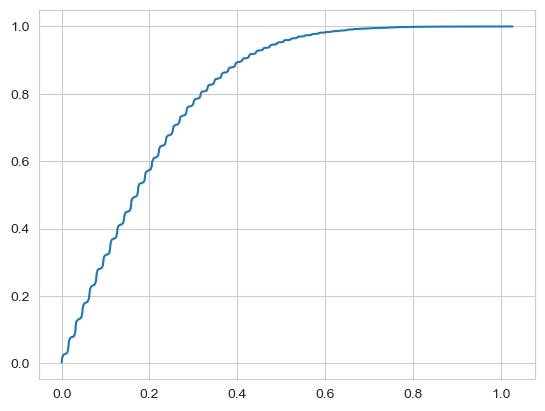

In [82]:
stats=[]
for i in range(10000):
	X=np.random.normal(size=1000,loc=0,scale=1)
	Y=np.random.normal(size=1000,loc=0,scale=1)
	stats.append(kstest(X,Y))
x=np.linspace(min(stats),max(stats),10000)
plt.plot(x,[efrone(stats,i) for i in x])

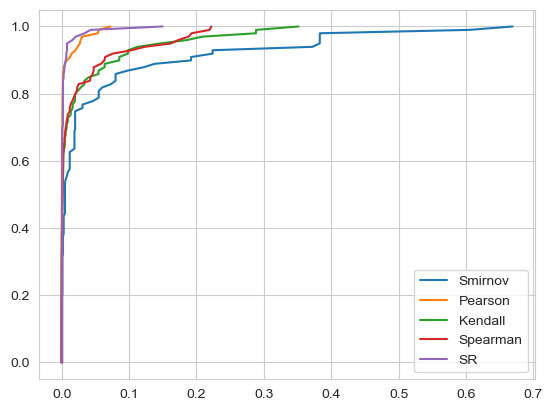

In [77]:
pvalsmirnov=[]
pvalpearson=[]
pvalkendall=[]
pvalspearman=[]
pvalSR=[]
for i in range(100):
	X=np.random.uniform(low=-1,high=2,size=20)
	Y=X**2+np.random.normal(loc=0,scale=0.5**0.5,size=20)
	pvalsmirnov.append(1-efrone(stats,kstest(X,Y)))
	pvalpearson.append(st.pearsonr(X,Y).pvalue)
	pvalkendall.append(st.kendalltau(X,Y).pvalue)
	pvalspearman.append(st.spearmanr(X,Y).pvalue)
	pvalSR.append(Dcorr().test(X,Y).pvalue)
x=np.linspace(0,1,100)
plt.plot(np.sort(pvalsmirnov),x,label='Smirnov')
plt.plot(np.sort(pvalpearson),x,label='Pearson')
plt.plot(np.sort(pvalkendall),x,label='Kendall')
plt.plot(np.sort(pvalspearman),x,label='Spearman')
plt.plot(np.sort(pvalSR),x,label='SR')
plt.legend()
plt.show()

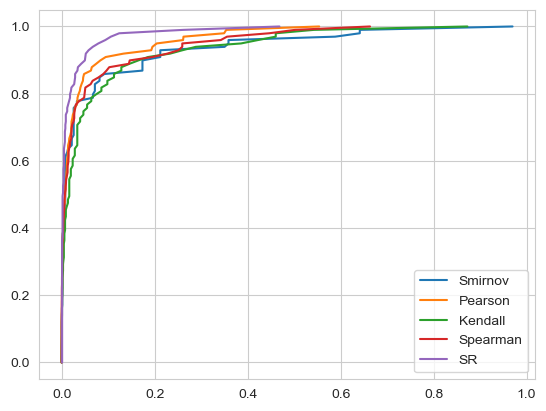

In [83]:
pvalsmirnov=[]
pvalpearson=[]
pvalkendall=[]
pvalspearman=[]
pvalSR=[]
for i in range(100):
	X=np.random.uniform(low=0,high=2,size=20)
	Y=np.sin(np.pi*X)+np.random.normal(loc=0,scale=0.5**0.5,size=20)
	pvalsmirnov.append(1-efrone(stats,kstest(X,Y)))
	pvalpearson.append(st.pearsonr(X,Y).pvalue)
	pvalkendall.append(st.kendalltau(X,Y).pvalue)
	pvalspearman.append(st.spearmanr(X,Y).pvalue)
	pvalSR.append(Dcorr().test(X,Y).pvalue)
x=np.linspace(0,1,100)
plt.plot(np.sort(pvalsmirnov),x,label='Smirnov')
plt.plot(np.sort(pvalpearson),x,label='Pearson')
plt.plot(np.sort(pvalkendall),x,label='Kendall')
plt.plot(np.sort(pvalspearman),x,label='Spearman')
plt.plot(np.sort(pvalSR),x,label='SR')
plt.legend()
plt.show()

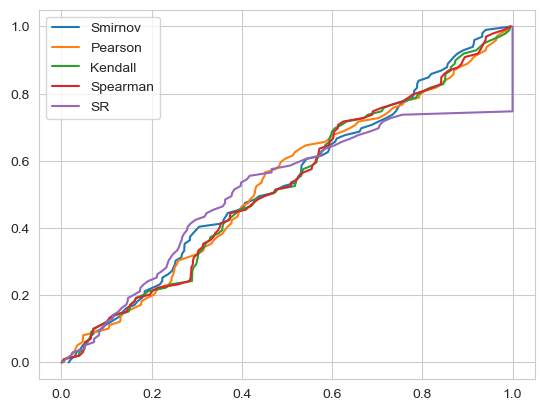

In [84]:
pvalsmirnov=[]
pvalpearson=[]
pvalkendall=[]
pvalspearman=[]
pvalSR=[]
for i in range(100):
	X=np.random.normal(loc=0,scale=2,size=1000)
	Y=np.random.normal(loc=0,scale=2,size=1000)
	pvalsmirnov.append(1-efrone(stats,kstest(X,Y)))
	pvalpearson.append(st.pearsonr(X,Y).pvalue)
	pvalkendall.append(st.kendalltau(X,Y).pvalue)
	pvalspearman.append(st.spearmanr(X,Y).pvalue)
	pvalSR.append(Dcorr().test(X,Y).pvalue)
x=np.linspace(0,1,100)
plt.plot(np.sort(pvalsmirnov),x,label='Smirnov')
plt.plot(np.sort(pvalpearson),x,label='Pearson')
plt.plot(np.sort(pvalkendall),x,label='Kendall')
plt.plot(np.sort(pvalspearman),x,label='Spearman')
plt.plot(np.sort(pvalSR),x,label='SR')
plt.legend()
plt.show()